# **Data Analysis for Supply Chain**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchinfo import summary
from tqdm.notebook import tqdm

In [3]:
path = "../../../dataco-smart-supply-chain-for-big-data-analysis"
df=pd.read_csv(path+"/DataCoSupplyChainDataset.csv", encoding='latin1')


In [4]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)


In [5]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [6]:
df = df[(df['product_card_id'] == 365)] 
# Splitting the 'order_date_dateorders' column into separate date and time columns
df[['date', 'time']] = df['order_date_dateorders'].str.split(' ', expand=True)
# Converting the 'date' column to datetime with the format '%m/%d/%Y'
df['order_date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
# Sorting the DataFrame by 'order_date' to ensure chronological order
df = df.sort_values(by='order_date')
# Resetting the index to start from 1
df.reset_index(drop=True, inplace=True)




In [7]:
df

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,date,time,order_date
0,DEBIT,6,4,5.690000,50.389999,Late delivery,1,17,Cleats,Caguas,...,COMPLETE,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/7/2015 15:24,Standard Class,1/1/2015,15:24,2015-01-01
1,PAYMENT,5,4,14.280000,50.990002,Late delivery,1,17,Cleats,Caguas,...,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/6/2015 20:19,Standard Class,1/1/2015,20:19,2015-01-01
2,DEBIT,2,4,43.119999,118.779999,Advance shipping,0,17,Cleats,Jersey City,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/3/2015 22:46,Standard Class,1/1/2015,22:46,2015-01-01
3,CASH,3,4,-102.029999,152.970001,Advance shipping,0,17,Cleats,Del Rio,...,CLOSED,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/4/2015 19:37,Standard Class,1/1/2015,19:37,2015-01-01
4,CASH,3,2,13.940000,49.790001,Late delivery,1,17,Cleats,Cordova,...,CLOSED,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/4/2015 12:36,Second Class,1/1/2015,12:36,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,DEBIT,4,4,45.389999,174.570007,Shipping on time,0,17,Cleats,Winter Park,...,COMPLETE,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/6/2017 10:40,Standard Class,10/2/2017,10:40,2017-10-02
24511,DEBIT,3,4,-0.820000,58.790001,Advance shipping,0,17,Cleats,Caguas,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/5/2017 12:04,Standard Class,10/2/2017,12:04,2017-10-02
24512,TRANSFER,3,2,26.490000,57.590000,Late delivery,1,17,Cleats,Aurora,...,PROCESSING,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/5/2017 5:04,Second Class,10/2/2017,5:04,2017-10-02
24513,PAYMENT,2,2,-302.350006,215.960007,Shipping on time,0,17,Cleats,Brooklyn,...,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/4/2017 4:43,Second Class,10/2/2017,4:43,2017-10-02


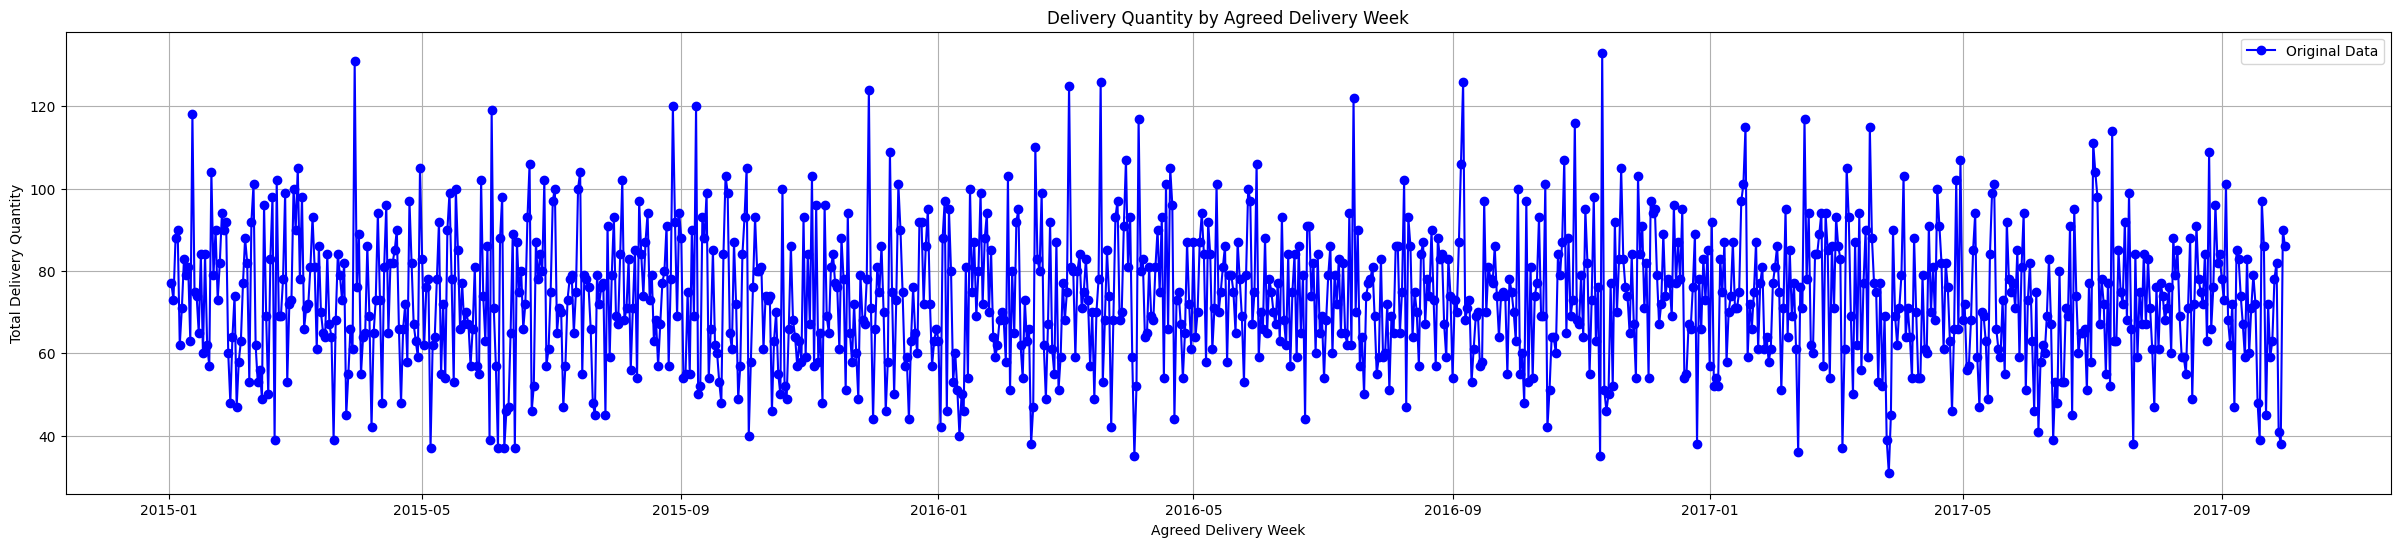

In [8]:
# dfx = df[(df['product_card_id'] == 365)] 

dfx = df.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]
plt.figure(figsize=(30, 6))
plt.plot(dfx['order_date'], dfx['order_item_quantity'], color='blue', marker='o', linestyle='-', label='Original Data')

plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Total Delivery Quantity')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [9]:
# ['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
    #    'benefit_per_order', 'sales_per_customer', 'delivery_status',
    #    'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
    #    'customer_country', 'customer_id', 'customer_segment', 'customer_state',
    #    'department_id', 'department_name', 'latitude', 'longitude', 'market',
    #    'order_city', 'order_country', 'order_customer_id',
    #    'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
    #    'order_item_discount', 'order_item_discount_rate', 'order_item_id',
    #    'order_item_product_price', 'order_item_profit_ratio',
    #    'order_item_quantity', 'sales', 'order_item_total',
    #    'order_profit_per_order', 'order_region', 'order_state', 'order_status',
    #    'product_card_id', 'product_category_id', 'product_name',
    #    'product_price', 'shipping_date_dateorders', 'shipping_mode',
    #    'customer_full_name']

# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode']
# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']
feature = ['order_date','order_item_quantity','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']
# feature = ['order_item_quantity','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio','product_price']


df = df[feature]

In [10]:
df = df.drop_duplicates()

# Check for duplicated rows
duplicated_rows = df.duplicated()
# Filter the DataFrame to show duplicated rows
duplicated_df = df[duplicated_rows]
print("Duplicated Rows:")
print(duplicated_df)


Duplicated Rows:
Empty DataFrame
Columns: [order_date, order_item_quantity, category_name, customer_city, customer_country, customer_segment, customer_state, department_name, market, product_name, product_price, shipping_mode, order_item_discount, order_item_discount_rate, order_item_product_price, order_item_profit_ratio]
Index: []


In [11]:
# object_columns = ['category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','shipping_mode']
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for e in object_columns:
    tmp = pd.get_dummies(df[e],drop_first=True)
    df.drop([e],axis=1,inplace=True)
    df = pd.concat([df,tmp],axis=1)
df.shape

(24515, 621)

In [12]:



train =   df[ df['order_date'] <= '2016-06' ]
val =  df[df['order_date'] <= '2017-01']
val =  val[val['order_date'] > '2016-06']
test =  df[df['order_date'] > '2017-01']

# df = df[df['order_date'] < '2017-10']

In [13]:
imputerealfeature = ['order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']

for e in imputerealfeature:
    # Calculate the mean of 'order_item_discount' in the train set
    mean_train = train[e].mean()
    # Create a new column in the test set with the mean value from the train set
    test[e] = mean_train


In [14]:


dfx_train=train .loc[:, train .columns !='order_item_quantity']
y_train=train .loc[:, train .columns =='order_item_quantity']
dfx_val=val .loc[:, val .columns !='order_item_quantity']
y_val=val .loc[:, val .columns =='order_item_quantity']
dfx_test=test .loc[:, test .columns !='order_item_quantity']
y_test=test .loc[:, test .columns =='order_item_quantity']


# # x_train, x_test,y_train,x_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)
x_train = dfx_train.drop(['order_date'],axis=1)
x_val = dfx_val.drop(['order_date'],axis=1)
x_test = dfx_test.drop(['order_date'],axis=1)

print('x_train shape:',x_train.shape)
print('y_train shape:', y_train.shape, '\n')
print('x_val shape:',x_val.shape)
print('y_val shape:', y_val.shape, '\n')
print('x_test shape:',x_test.shape)
print('y_test shape:', y_test.shape)



# x_train, x_test,y_train,y_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

x_train shape: (12697, 619)
y_train shape: (12697, 1) 

x_val shape: (5230, 619)
y_val shape: (5230, 1) 

x_test shape: (6588, 619)
y_test shape: (6588, 1)


In [15]:
x_train

,product_price,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,Alameda,Albany,Albuquerque,Algonquin,Alhambra,...,WA,WI,WV,Europe,LATAM,Pacific Asia,USCA,Same Day,Second Class,Standard Class
0,59.990002,9.600000,0.16,59.990002,0.11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,59.990002,9.000000,0.15,59.990002,0.28,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,59.990002,1.200000,0.01,59.990002,0.36,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,59.990002,27.000000,0.15,59.990002,-0.67,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,59.990002,10.200000,0.17,59.990002,0.28,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,59.990002,6.600000,0.06,59.990002,-0.32,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12693,59.990002,13.200000,0.06,59.990002,0.46,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12694,59.990002,16.799999,0.07,59.990002,0.30,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12695,59.990002,4.800000,0.04,59.990002,0.05,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [16]:
y_train

,order_item_quantity
0,1
1,1
2,2
3,3
4,1
...,...
12692,2
12693,4
12694,4
12695,2


In [17]:
class RainfallDatasetFF(Dataset):
    def __init__(self, x, y, normalizer):
        self.x = x.astype(np.float32)
        self.y = y.astype(np.float32)
        self.normalizer = normalizer
        print(self.x.shape)
        print(self.y.shape)

    def __getitem__(self, index):
        x = self.x[index] # Retrieve data
        x = self.normalizer.transform(x.reshape(1, -1)) # Normalize
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]
    
def normalizer_std(X):
    scaler = preprocessing.StandardScaler().fit(X)
    return scaler

def normalizer_minmax(X):
    scaler = preprocessing.MinMaxScaler().fit(X)
    return scaler

In [18]:
class FeedForwardNN(nn.Module):
    def __init__(self, hidden_size=500):
        super(FeedForwardNN, self).__init__()
        self.ff1 = nn.Linear(619, hidden_size)
        self.do1 = nn.Dropout(p=0.3)
        self.ff2 = nn.Linear(hidden_size, hidden_size)
        self.do2 = nn.Dropout(p=0.3)
        self.ff3 = nn.Linear(hidden_size, hidden_size)
        self.do3 = nn.Dropout(p=0.3)
        self.out = nn.Linear(hidden_size, 1)


    def forward(self, x):
        hd1 = F.relu(self.ff1(x))
        x2 = F.relu(self.do1(hd1))
        hd2 = F.relu(self.ff2(x2))
        x3 = F.relu(self.do2(hd2))
        hd3 = F.relu(self.ff3(x3))
        y = F.relu(self.do3(hd3))
        y = self.out(y)
        return y.reshape(-1, 1)

In [19]:
normalizer = normalizer_std(x_train) # We will normalize everything based on x_train

train_dataset = RainfallDatasetFF(x_train.to_numpy(), y_train.to_numpy(), normalizer)
val_dataset = RainfallDatasetFF(x_val.to_numpy(), y_val.to_numpy(), normalizer)
test_dataset = RainfallDatasetFF(x_test.to_numpy(), y_test.to_numpy(), normalizer)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)

(12697, 619)
(12697, 1)
(5230, 619)
(5230, 1)
(6588, 619)
(6588, 1)


In [20]:
loss_fn = nn.MSELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
# Hyperparameters and other configs
config = {
    'architecture': 'feedforward',
    'lr': 0.01,
    'hidden_size': 500,
    'scheduler_factor': 0.25,
    'scheduler_patience': 2,
    'scheduler_min_lr': 1e-5,
    'epochs': 80
}

# Model
model_ff = FeedForwardNN(hidden_size=config['hidden_size'])
model_ff = model_ff.to(device)
optimizer = torch.optim.Adam(model_ff.parameters(), lr=config['lr'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    'min',
    factor=config['scheduler_factor'],
    patience=config['scheduler_patience'],
    min_lr=config['scheduler_min_lr']
)

summary(model_ff, input_size=(64, 619))

Layer (type:depth-idx)                   Output Shape              Param #
FeedForwardNN                            [64, 1]                   --
├─Linear: 1-1                            [64, 500]                 310,000
├─Dropout: 1-2                           [64, 500]                 --
├─Linear: 1-3                            [64, 500]                 250,500
├─Dropout: 1-4                           [64, 500]                 --
├─Linear: 1-5                            [64, 500]                 250,500
├─Dropout: 1-6                           [64, 500]                 --
├─Linear: 1-7                            [64, 1]                   501
Total params: 811,501
Trainable params: 811,501
Non-trainable params: 0
Total mult-adds (M): 51.94
Input size (MB): 0.16
Forward/backward pass size (MB): 0.77
Params size (MB): 3.25
Estimated Total Size (MB): 4.17

In [22]:
train_losses = []
val_losses = []
learning_rates = []

for epoch in range(config['epochs']):  # loop over the dataset multiple times

    # Training
    train_loss = []
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Flag model as training. Some layers behave differently in training and
    # inference modes, such as dropout, BN, etc.
    model_ff.train()

    print(f"Training epoch {epoch+1}...")
    print(f"Current LR: {current_lr}")

    for i, (inputs, y_true) in enumerate(tqdm(train_loader)):
        # Transfer data from cpu to gpu
        inputs = inputs.to(device)
        y_true = y_true.to(device)

        # Reset the gradient
        optimizer.zero_grad()

        # Predict
        y_pred = model_ff(inputs)

        # Calculate loss
        loss = loss_fn(y_pred, y_true)

        # Compute gradient
        loss.backward()

        # Update parameters
        optimizer.step()

        # Log stuff
        train_loss.append(loss)

    avg_train_loss = torch.stack(train_loss).mean().item()
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch+1} train loss: {avg_train_loss:.4f}")

    # Validation
    model_ff.eval()
    with torch.no_grad(): # No gradient is required during validation
        print(f"Validating epoch {epoch+1}")
        val_loss = []
        for i, (inputs, y_true) in enumerate(tqdm(val_loader)):
            # Transfer data from cpu to gpu
            inputs = inputs.to(device)
            y_true = y_true.to(device)

            # Predict
            y_pred = model_ff(inputs)

            # Calculate loss
            loss = loss_fn(y_pred, y_true)

            # Log stuff
            val_loss.append(loss)

        avg_val_loss = torch.stack(val_loss).mean().item()
        val_losses.append(avg_val_loss)
        print(f"Epoch {epoch+1} val loss: {avg_val_loss:.4f}")

        # LR adjustment with scheduler
        scheduler.step(avg_val_loss)

        # Save checkpoint if val_loss is the best we got
        best_val_loss = np.inf if epoch == 0 else min(val_losses[:-1])
        if avg_val_loss < best_val_loss:
            # Save whatever you want
            state = {
                'epoch': epoch,
                'model': model_ff.state_dict(),
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'best_val_loss': best_val_loss,
            }

            print(f"Saving new best model..")
            torch.save(state, 'model_ff.pth.tar')

print('Finished Training')

Training epoch 1...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 1 train loss: 4.3254
Validating epoch 1


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 1 val loss: 1.4608
Saving new best model..
Training epoch 2...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 2 train loss: 1.6209
Validating epoch 2


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 2 val loss: 1.7141
Training epoch 3...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 3 train loss: 1.7082
Validating epoch 3


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 3 val loss: 1.4240
Saving new best model..
Training epoch 4...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 4 train loss: 1.5326
Validating epoch 4


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 4 val loss: 1.3308
Saving new best model..
Training epoch 5...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 5 train loss: 1.5121
Validating epoch 5


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 5 val loss: 1.5018
Training epoch 6...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 6 train loss: 1.4793
Validating epoch 6


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 6 val loss: 1.3259
Saving new best model..
Training epoch 7...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 7 train loss: 1.4475
Validating epoch 7


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 7 val loss: 1.3777
Training epoch 8...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 8 train loss: 1.4126
Validating epoch 8


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 8 val loss: 1.2823
Saving new best model..
Training epoch 9...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 9 train loss: 1.4288
Validating epoch 9


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 9 val loss: 1.3719
Training epoch 10...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 10 train loss: 1.4093
Validating epoch 10


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 10 val loss: 1.3239
Training epoch 11...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 11 train loss: 1.4073
Validating epoch 11


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 11 val loss: 1.3043
Training epoch 12...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 12 train loss: 1.3207
Validating epoch 12


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 12 val loss: 1.1894
Saving new best model..
Training epoch 13...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 13 train loss: 1.2761
Validating epoch 13


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 13 val loss: 1.1957
Training epoch 14...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 14 train loss: 1.2594
Validating epoch 14


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 14 val loss: 1.2112
Training epoch 15...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 15 train loss: 1.2498
Validating epoch 15


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 15 val loss: 1.1726
Saving new best model..
Training epoch 16...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 16 train loss: 1.2159
Validating epoch 16


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 16 val loss: 1.0492
Saving new best model..
Training epoch 17...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 17 train loss: 1.1659
Validating epoch 17


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 17 val loss: 1.0206
Saving new best model..
Training epoch 18...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 18 train loss: 1.1236
Validating epoch 18


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 18 val loss: 1.0253
Training epoch 19...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 19 train loss: 1.0520
Validating epoch 19


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 19 val loss: 0.8960
Saving new best model..
Training epoch 20...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 20 train loss: 1.0413
Validating epoch 20


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 20 val loss: 0.9422
Training epoch 21...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 21 train loss: 1.0100
Validating epoch 21


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 21 val loss: 0.9509
Training epoch 22...
Current LR: 0.0025


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 22 train loss: 1.0010
Validating epoch 22


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 22 val loss: 0.9502
Training epoch 23...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 23 train loss: 0.8838
Validating epoch 23


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 23 val loss: 0.7504
Saving new best model..
Training epoch 24...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 24 train loss: 0.8138
Validating epoch 24


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 24 val loss: 0.7428
Saving new best model..
Training epoch 25...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 25 train loss: 0.7799
Validating epoch 25


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 25 val loss: 0.6923
Saving new best model..
Training epoch 26...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 26 train loss: 0.7451
Validating epoch 26


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 26 val loss: 0.6448
Saving new best model..
Training epoch 27...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 27 train loss: 0.7346
Validating epoch 27


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 27 val loss: 0.6328
Saving new best model..
Training epoch 28...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 28 train loss: 0.7006
Validating epoch 28


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 28 val loss: 0.6120
Saving new best model..
Training epoch 29...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 29 train loss: 0.6820
Validating epoch 29


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 29 val loss: 0.6196
Training epoch 30...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 30 train loss: 0.6622
Validating epoch 30


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 30 val loss: 0.5929
Saving new best model..
Training epoch 31...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 31 train loss: 0.6413
Validating epoch 31


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 31 val loss: 0.5690
Saving new best model..
Training epoch 32...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 32 train loss: 0.6205
Validating epoch 32


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 32 val loss: 0.5334
Saving new best model..
Training epoch 33...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 33 train loss: 0.6070
Validating epoch 33


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 33 val loss: 0.5272
Saving new best model..
Training epoch 34...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 34 train loss: 0.5910
Validating epoch 34


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 34 val loss: 0.5394
Training epoch 35...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 35 train loss: 0.5876
Validating epoch 35


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 35 val loss: 0.5072
Saving new best model..
Training epoch 36...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 36 train loss: 0.5837
Validating epoch 36


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 36 val loss: 0.4979
Saving new best model..
Training epoch 37...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 37 train loss: 0.5563
Validating epoch 37


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 37 val loss: 0.4935
Saving new best model..
Training epoch 38...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 38 train loss: 0.5429
Validating epoch 38


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 38 val loss: 0.5019
Training epoch 39...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 39 train loss: 0.5551
Validating epoch 39


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 39 val loss: 0.5066
Training epoch 40...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 40 train loss: 0.5475
Validating epoch 40


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 40 val loss: 0.4854
Saving new best model..
Training epoch 41...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 41 train loss: 0.5411
Validating epoch 41


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 41 val loss: 0.4943
Training epoch 42...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 42 train loss: 0.5354
Validating epoch 42


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 42 val loss: 0.5071
Training epoch 43...
Current LR: 0.000625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 43 train loss: 0.5255
Validating epoch 43


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 43 val loss: 0.4890
Training epoch 44...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 44 train loss: 0.5040
Validating epoch 44


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 44 val loss: 0.4650
Saving new best model..
Training epoch 45...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 45 train loss: 0.5003
Validating epoch 45


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 45 val loss: 0.4602
Saving new best model..
Training epoch 46...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 46 train loss: 0.4850
Validating epoch 46


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 46 val loss: 0.4479
Saving new best model..
Training epoch 47...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 47 train loss: 0.4750
Validating epoch 47


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 47 val loss: 0.4528
Training epoch 48...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 48 train loss: 0.4741
Validating epoch 48


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 48 val loss: 0.4373
Saving new best model..
Training epoch 49...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 49 train loss: 0.4705
Validating epoch 49


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 49 val loss: 0.4307
Saving new best model..
Training epoch 50...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 50 train loss: 0.4665
Validating epoch 50


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 50 val loss: 0.4437
Training epoch 51...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 51 train loss: 0.4611
Validating epoch 51


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 51 val loss: 0.4274
Saving new best model..
Training epoch 52...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 52 train loss: 0.4509
Validating epoch 52


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 52 val loss: 0.4241
Saving new best model..
Training epoch 53...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 53 train loss: 0.4627
Validating epoch 53


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 53 val loss: 0.4238
Saving new best model..
Training epoch 54...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 54 train loss: 0.4508
Validating epoch 54


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 54 val loss: 0.4314
Training epoch 55...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 55 train loss: 0.4486
Validating epoch 55


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 55 val loss: 0.4258
Training epoch 56...
Current LR: 0.00015625


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 56 train loss: 0.4457
Validating epoch 56


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 56 val loss: 0.4244
Training epoch 57...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 57 train loss: 0.4305
Validating epoch 57


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 57 val loss: 0.4172
Saving new best model..
Training epoch 58...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 58 train loss: 0.4372
Validating epoch 58


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 58 val loss: 0.4196
Training epoch 59...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 59 train loss: 0.4424
Validating epoch 59


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 59 val loss: 0.4174
Training epoch 60...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 60 train loss: 0.4464
Validating epoch 60


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 60 val loss: 0.4167
Saving new best model..
Training epoch 61...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 61 train loss: 0.4340
Validating epoch 61


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 61 val loss: 0.4227
Training epoch 62...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 62 train loss: 0.4459
Validating epoch 62


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 62 val loss: 0.4163
Saving new best model..
Training epoch 63...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 63 train loss: 0.4418
Validating epoch 63


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 63 val loss: 0.4160
Saving new best model..
Training epoch 64...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 64 train loss: 0.4293
Validating epoch 64


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 64 val loss: 0.4190
Training epoch 65...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 65 train loss: 0.4389
Validating epoch 65


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 65 val loss: 0.4201
Training epoch 66...
Current LR: 3.90625e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 66 train loss: 0.4310
Validating epoch 66


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 66 val loss: 0.4183
Training epoch 67...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 67 train loss: 0.4387
Validating epoch 67


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 67 val loss: 0.4187
Training epoch 68...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 68 train loss: 0.4370
Validating epoch 68


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 68 val loss: 0.4177
Training epoch 69...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 69 train loss: 0.4389
Validating epoch 69


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 69 val loss: 0.4174
Training epoch 70...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 70 train loss: 0.4312
Validating epoch 70


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 70 val loss: 0.4179
Training epoch 71...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 71 train loss: 0.4307
Validating epoch 71


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 71 val loss: 0.4160
Training epoch 72...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 72 train loss: 0.4275
Validating epoch 72


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 72 val loss: 0.4165
Training epoch 73...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 73 train loss: 0.4433
Validating epoch 73


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 73 val loss: 0.4170
Training epoch 74...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 74 train loss: 0.4272
Validating epoch 74


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 74 val loss: 0.4155
Saving new best model..
Training epoch 75...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 75 train loss: 0.4304
Validating epoch 75


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 75 val loss: 0.4161
Training epoch 76...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 76 train loss: 0.4298
Validating epoch 76


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 76 val loss: 0.4156
Training epoch 77...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 77 train loss: 0.4269
Validating epoch 77


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 77 val loss: 0.4156
Training epoch 78...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 78 train loss: 0.4315
Validating epoch 78


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 78 val loss: 0.4146
Saving new best model..
Training epoch 79...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 79 train loss: 0.4365
Validating epoch 79


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 79 val loss: 0.4152
Training epoch 80...
Current LR: 1e-05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 80 train loss: 0.4246
Validating epoch 80


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 80 val loss: 0.4142
Saving new best model..
Finished Training


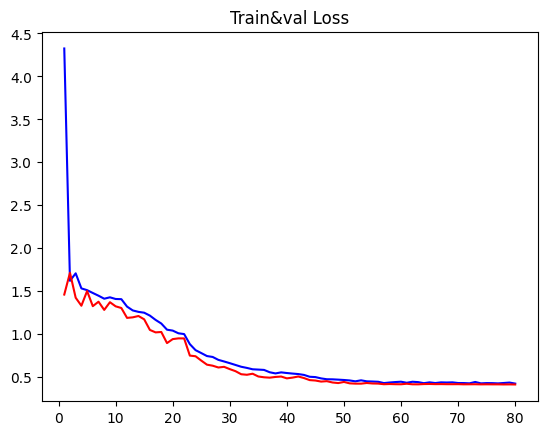

In [23]:
x = [i + 1 for i in range(config['epochs'])]

plt.plot(x, train_losses,color = 'blue')
plt.title("Train&val Loss")
plt.plot(x, val_losses,color = 'red')

plt.show()

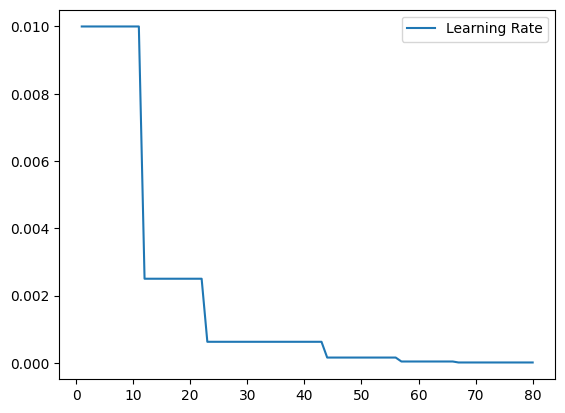

In [24]:
plt.plot(x, learning_rates, label="Learning Rate")
plt.legend()
plt.show()

In [25]:
# Assuming you have defined your model (model_gru) and loaded the test dataset (test_loader)

# Load the best model checkpoint
checkpoint = torch.load("model_ff.pth.tar")
model_ff.load_state_dict(checkpoint['model'])

# Set model to evaluation mode
model_ff.eval()

# Make predictions on the test set
predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:  # assuming test_loader yields (inputs, _), where _ is ignored
        inputs = inputs.to(device)  # Transfer data to GPU if available
        y_pred = model_ff(inputs)
        predictions.append(y_pred.cpu().numpy())  # Convert predictions to numpy array and move to CPU

# Concatenate predictions into a single numpy array
predictions = np.concatenate(predictions)

# Now you have predictions for the test set, you can further process or analyze them as needed.


In [26]:

# predictions = pd.DataFrame(predictions, columns=['predictions'])

In [27]:
predictions

array([[2.958385 ],
       [2.9867594],
       [2.8419886],
       ...,
       [3.406384 ],
       [3.2896974],
       [3.3346272]], dtype=float32)

In [28]:
y_test

,order_item_quantity
17927,4
17928,1
17929,1
17930,5
17931,3
...,...
24510,3
24511,1
24512,1
24513,4


In [29]:
y_test["Predict"] = predictions

In [30]:
y_test
y_test = y_test.rename(columns={'order_item_quantity': 'Actual'})

In [31]:
dfx_test

,order_date,product_price,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,Alameda,Albany,Albuquerque,Algonquin,...,WA,WI,WV,Europe,LATAM,Pacific Asia,USCA,Same Day,Second Class,Standard Class
17927,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17928,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17929,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17930,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17931,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
24511,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
24512,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
24513,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:

result_df = pd.merge(dfx_test, y_test, left_index=True, right_index=True)
# Now results_df contains the merged DataFrame with columns suffixed with '_actual' and '_predict'


In [33]:
# results_df = results_df.rename(columns={'Predict_y': 'Predict', 'order_item_quantity': 'Actual'})
result_df

,order_date,product_price,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,Alameda,Albany,Albuquerque,Algonquin,...,WV,Europe,LATAM,Pacific Asia,USCA,Same Day,Second Class,Standard Class,Actual,Predict
17927,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,1,0,0,0,0,4,2.958385
17928,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2.986759
17929,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2.841989
17930,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,1,5,3.391855
17931,2017-01-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,0,0,0,0,0,0,1,3,3.861227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,1,0,0,0,0,0,1,3,2.968099
24511,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2.996759
24512,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,1,0,0,0,0,1,0,1,3.406384
24513,2017-10-02,59.990002,18.239796,0.101529,59.990002,0.122557,0,0,0,0,...,0,1,0,0,0,0,1,0,4,3.289697


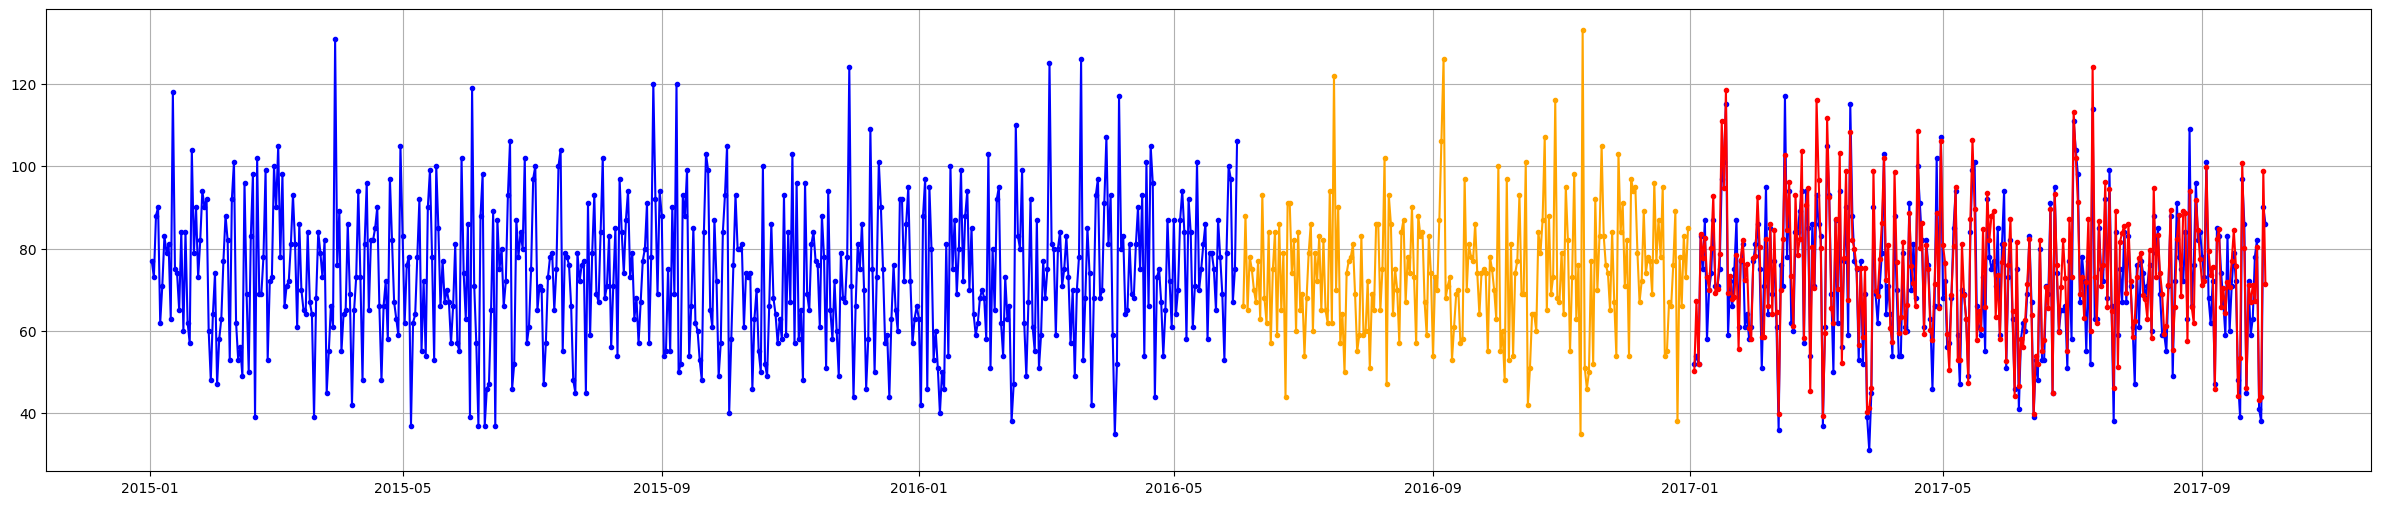

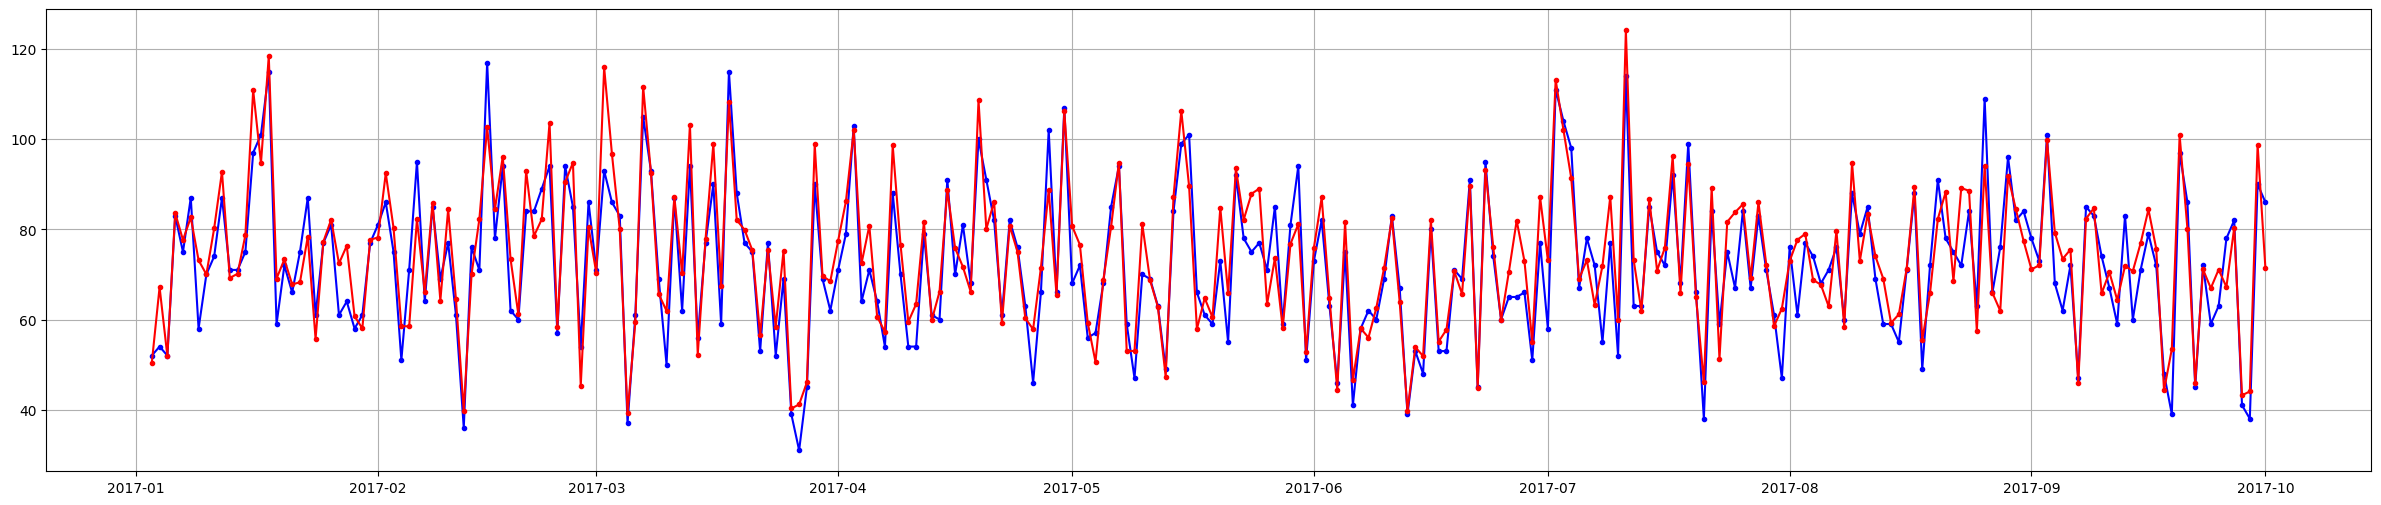

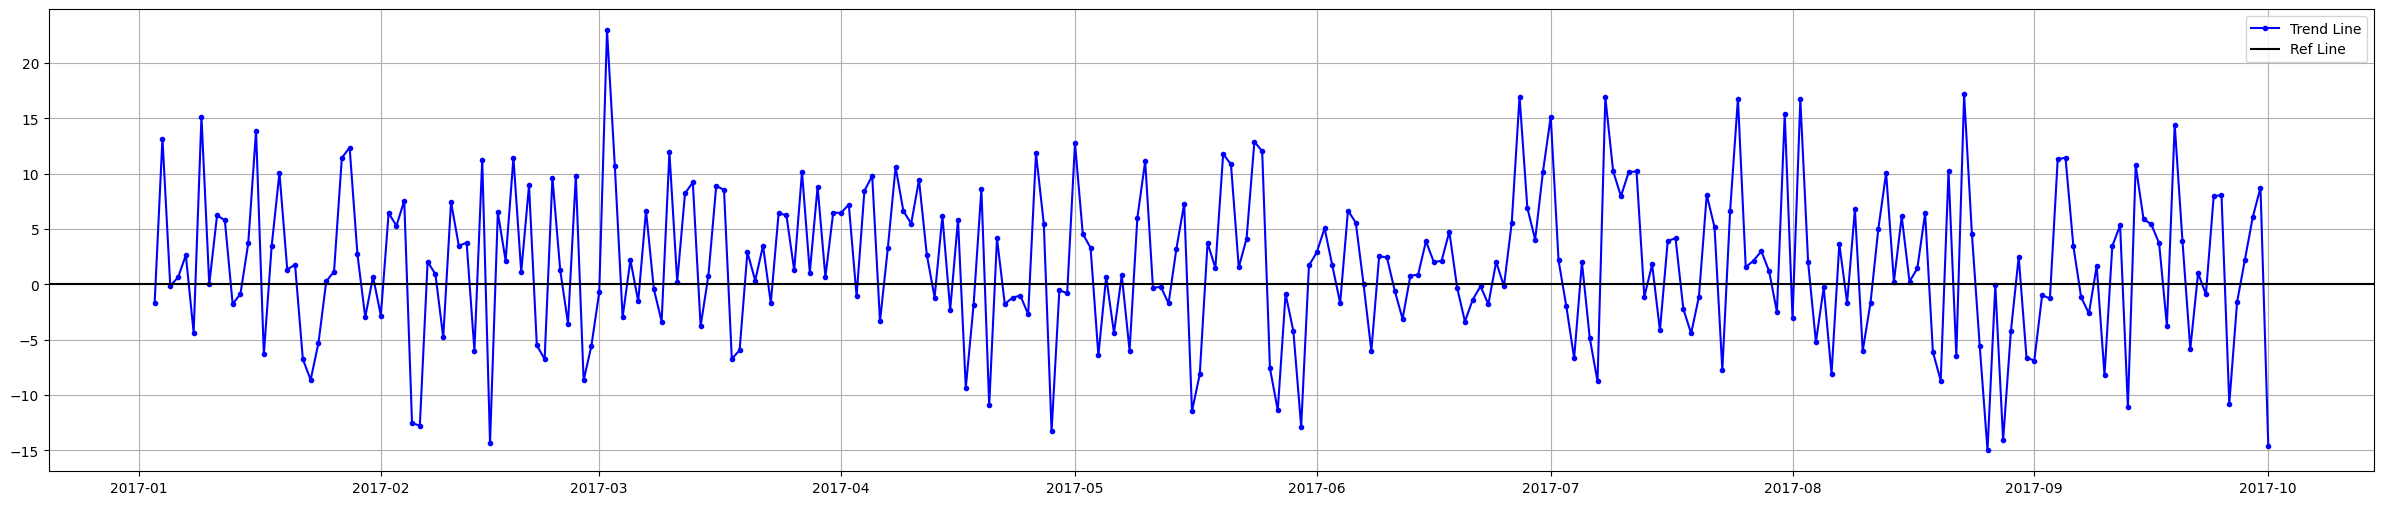

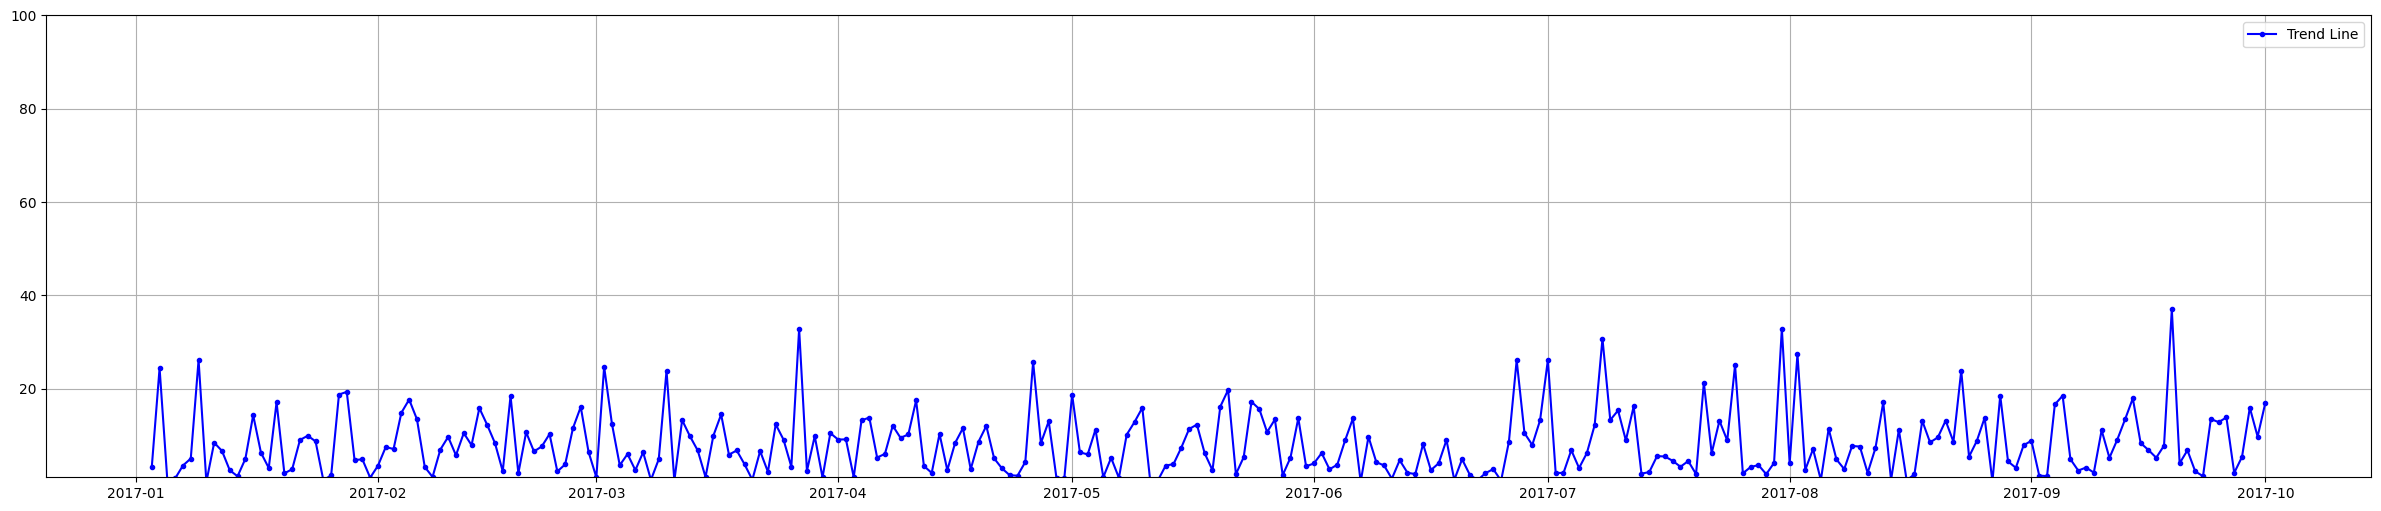

In [34]:

df_grouped_actual = result_df.groupby('order_date')['Actual'].sum().reset_index()[1:-1]
df_grouped_predict = result_df.groupby('order_date')['Predict'].sum().reset_index()[1:-1]

df_train = train.sort_values(by='order_date').reset_index()
df_train= df_train.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]

df_val = val.sort_values(by='order_date').reset_index()
df_val= df_val.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]

# Merging the two grouped DataFrames on 'order_date'
results_df = pd.merge(df_grouped_actual, df_grouped_predict, on='order_date', suffixes=('_actual', '_predict'))

plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(results_df['order_date'], results_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_train['order_date'], df_train['order_item_quantity'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_val['order_date'], df_val['order_item_quantity'], color='orange', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(results_df['order_date'], results_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'],results_df['Predict']-results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], (abs(results_df['Predict'] - results_df['Actual']) / results_df['Actual']) * 100, color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.legend()  # Show legend
plt.ylim(1, 100)  # Set y-axis limits
plt.show()

In [35]:
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(y_test['Actual'],y_test['Predict']))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(y_test['Actual'],y_test['Predict'])))#Printing Root mean squared error for predicting Number of products per order


MAE of Total amount per order is         : 1.2183323587858106
RMSE of Total amount per order is        : 1.4331601982052813


In [36]:
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(results_df['Actual'],results_df['Predict']))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(results_df['Actual'],results_df['Predict'])))#Printing Root mean squared error for predicting Number of products per order


MAE of Total amount per order is         : 5.543363907757928
RMSE of Total amount per order is        : 7.038499602781643
